This model is trained on a smaller datasets.

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-20 08:50:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.63.207, 142.250.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   146MB/s    in 0.4s    

2023-09-20 08:50:50 (146 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

baseDir = "cats_and_dogs_filtered"
print('Content of Base Directory :')
print(os.listdir(baseDir))

print('Content of train directory: ', os.listdir(f'{baseDir}/train'))

print('Content of validation directory: ', os.listdir(f'{baseDir}/validation'))

Content of Base Directory :
['train', 'validation', 'vectorize.py']
Content of train directory:  ['dogs', 'cats']
Content of validation directory:  ['dogs', 'cats']


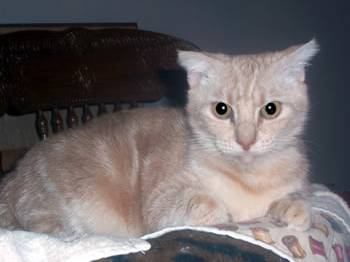

In [30]:
from PIL import Image
import random

cat_dir = baseDir + '/' +'train/cats/'
dog_dir = baseDir + '/' +'train/dogs/'

random_num = random.randint(1,1000)
cat_name = os.listdir(cat_dir)[random_num]
dog_name = os.listdir(dog_dir)[random_num]

Image.open(os.path.join(cat_dir, cat_name))

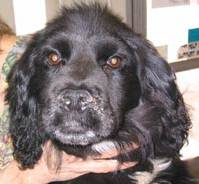

In [29]:
Image.open(os.path.join(dog_dir, dog_name))

In [ ]:
train_dir = os.path.join(baseDir,'train')
validation_dir = os.path.join(baseDir,'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fname = os.listdir(train_cats_dir)
train_dog_fname = os.listdir(train_dogs_dir)

print(train_cat_fname[:10])
print(train_dog_fname[:10])

['cat.639.jpg', 'cat.884.jpg', 'cat.100.jpg', 'cat.526.jpg', 'cat.384.jpg', 'cat.519.jpg', 'cat.888.jpg', 'cat.726.jpg', 'cat.922.jpg', 'cat.217.jpg']
['dog.154.jpg', 'dog.871.jpg', 'dog.428.jpg', 'dog.801.jpg', 'dog.573.jpg', 'dog.963.jpg', 'dog.794.jpg', 'dog.139.jpg', 'dog.656.jpg', 'dog.187.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate = 0.001),
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs = 15,
                    validation_data = validation_generator,
                    verbose = 1)

Epoch 1/15
100/100 [==============================] - 19s 61ms/step - loss: 0.8679 - accuracy: 0.5225 - val_loss: 0.6912 - val_accuracy: 0.6380
Epoch 2/15
100/100 [==============================] - 5s 48ms/step - loss: 0.6936 - accuracy: 0.5865 - val_loss: 0.6494 - val_accuracy: 0.6010
Epoch 3/15
100/100 [==============================] - 6s 59ms/step - loss: 0.6288 - accuracy: 0.6670 - val_loss: 0.6400 - val_accuracy: 0.6470
Epoch 4/15
100/100 [==============================] - 6s 59ms/step - loss: 0.5783 - accuracy: 0.6985 - val_loss: 0.5769 - val_accuracy: 0.7090
Epoch 5/15
100/100 [==============================] - 6s 59ms/step - loss: 0.5261 - accuracy: 0.7435 - val_loss: 0.6058 - val_accuracy: 0.6910
Epoch 6/15
100/100 [==============================] - 5s 48ms/step - loss: 0.4784 - accuracy: 0.7755 - val_loss: 0.5387 - val_accuracy: 0.7210
Epoch 7/15
100/100 [==============================] - 7s 66ms/step - loss: 0.4235 - accuracy: 0.7940 - val_loss: 0.6312 - val_accuracy: 0.673

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving cat1crop.jpg to cat1crop.jpg
1/1 [==============================] - 0s 22ms/step
[0.3157813]
cat1crop.jpg is a cat


1/1 [==============================] - 0s 286ms/step


<ipython-input-16-d724d82c3e64>:51: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


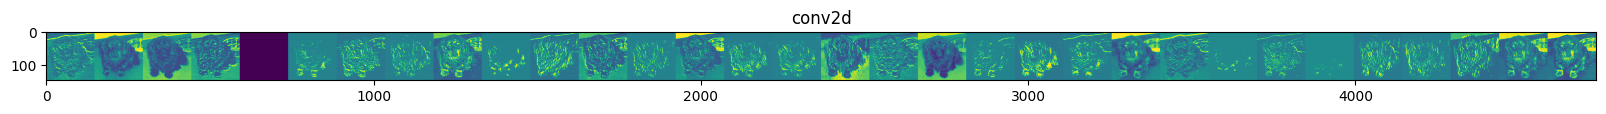

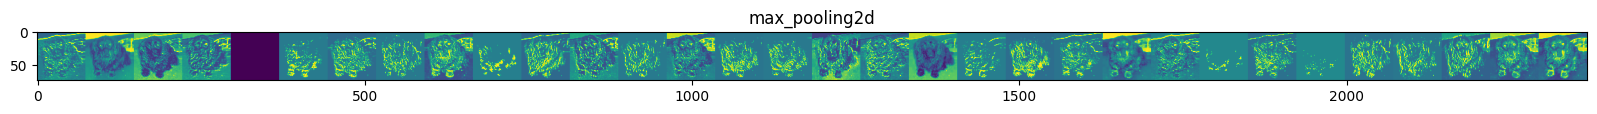

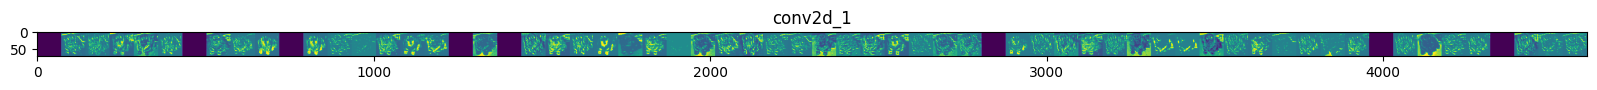

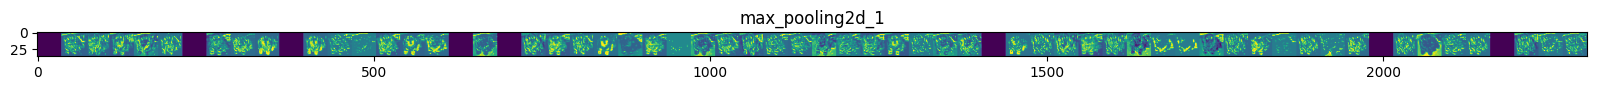

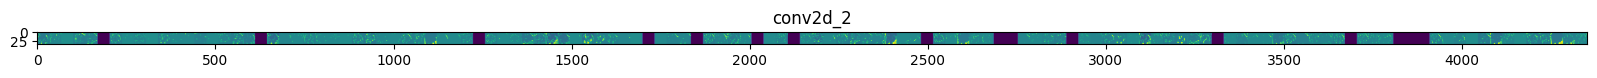

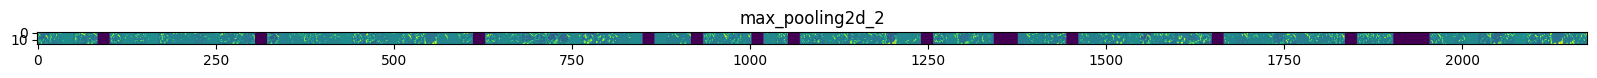

In [ ]:
import numpy as np
import random
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fname]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fname]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )